<h1 align="center">MEDICAL EXPENDITURE PREDICTOR</h1>

<h2 align = center>Reading the dataset using Pandas</h2>

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('Dataset/medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

<h2 align = center>Visualization</h2>

In [3]:
 fig = px.histogram(medical_df,
                    x = 'age',
                    marginal = 'box',
                    nbins = 47,
                    title = 'Distribution of Age',
                    width=1000, height=500)
fig.update_layout(bargap = 0.1)
fig.show()

NameError: name 'px' is not defined

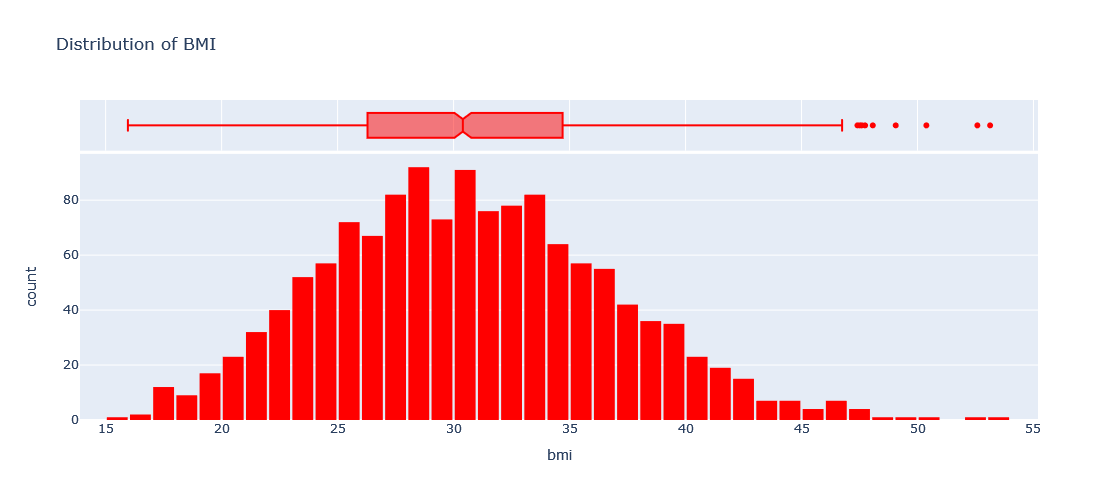

In [22]:
 fig = px.histogram(medical_df,
                    x = 'bmi',
                    marginal = 'box',
                    color_discrete_sequence=['red'],
                    title = 'Distribution of BMI',
                    width=1000, height=500)
fig.update_layout(bargap = 0.1)
fig.show()

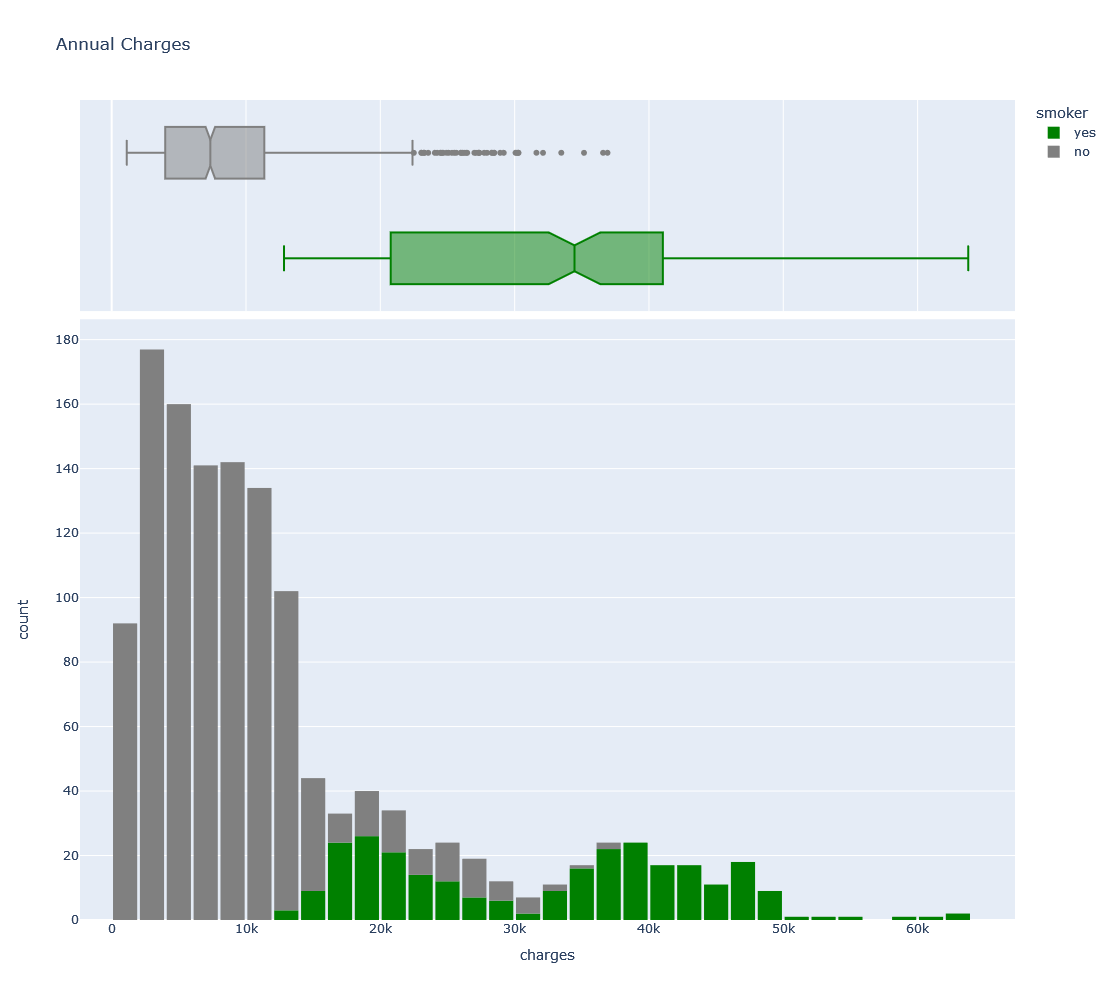

In [32]:
 fig = px.histogram(medical_df,
                    x = 'charges',
                    marginal = 'box',
                    color = 'smoker',
                    color_discrete_sequence=['green', 'grey'],
                    title = 'Annual Charges',
                    width=1000, height=1000)
fig.update_layout(bargap = 0.1)
fig.show()

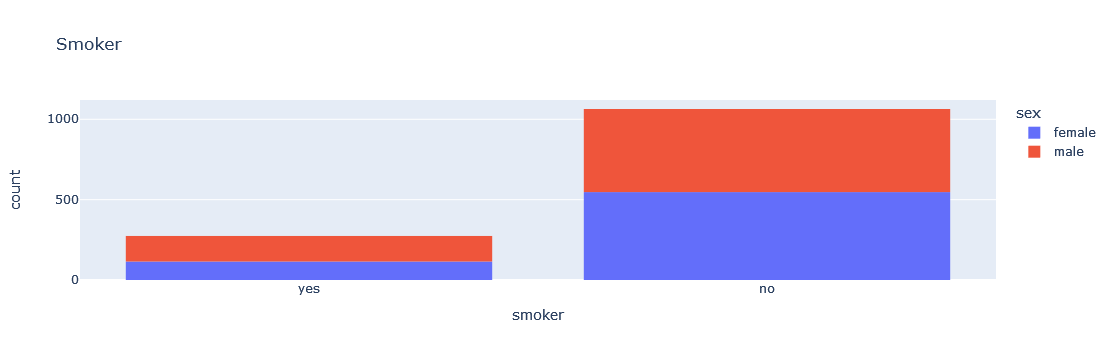

In [33]:
px.histogram(medical_df,
             x='smoker',
             color='sex',
             title='Smoker',
             )

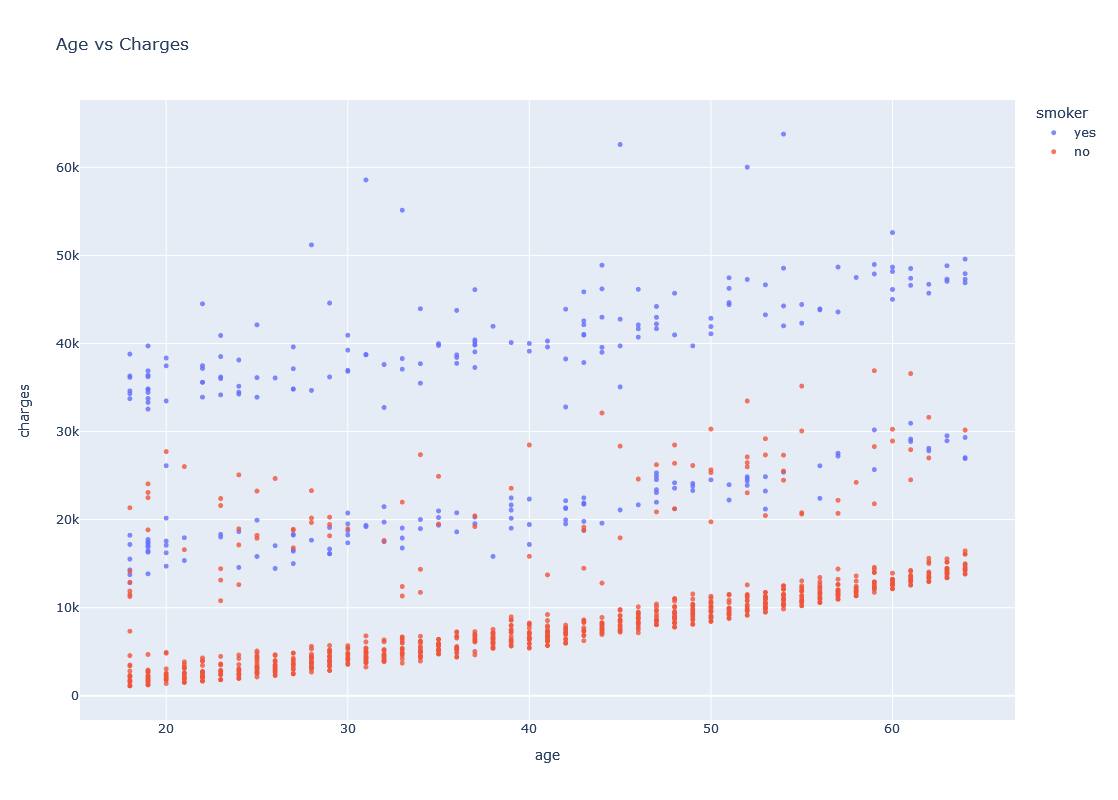

In [42]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8, 
                 hover_data = ['sex'],
                 title = 'Age vs Charges',
                 width = 1000,
                 height = 800,)
fig.update_traces(marker_size = 5)
# fig.show()

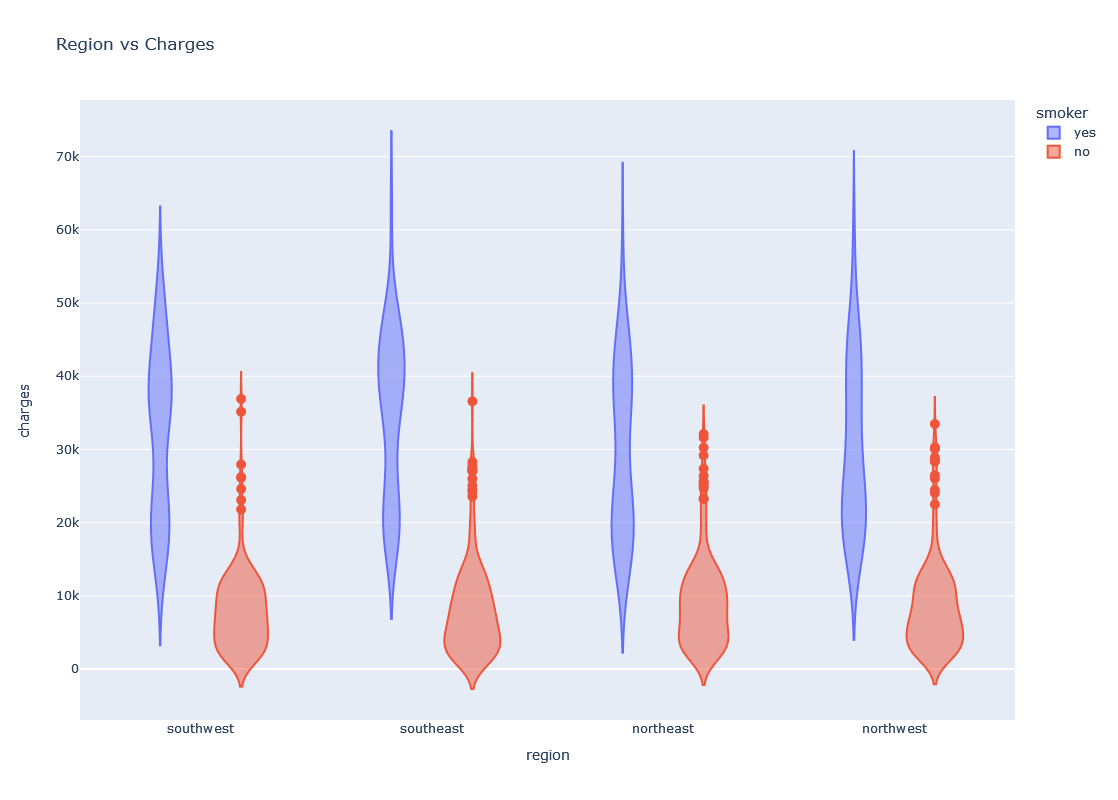

In [106]:
fig = px.violin(medical_df,
                 x = 'region',
                 y = 'charges',
                 color = 'smoker',
                 # opacity = 0.8, 
                 hover_data = ['sex'],
                 title = 'Region vs Charges',
                 width = 1000,
                 height = 800,)
fig.update_traces(marker_size = 10)
# fig.show()

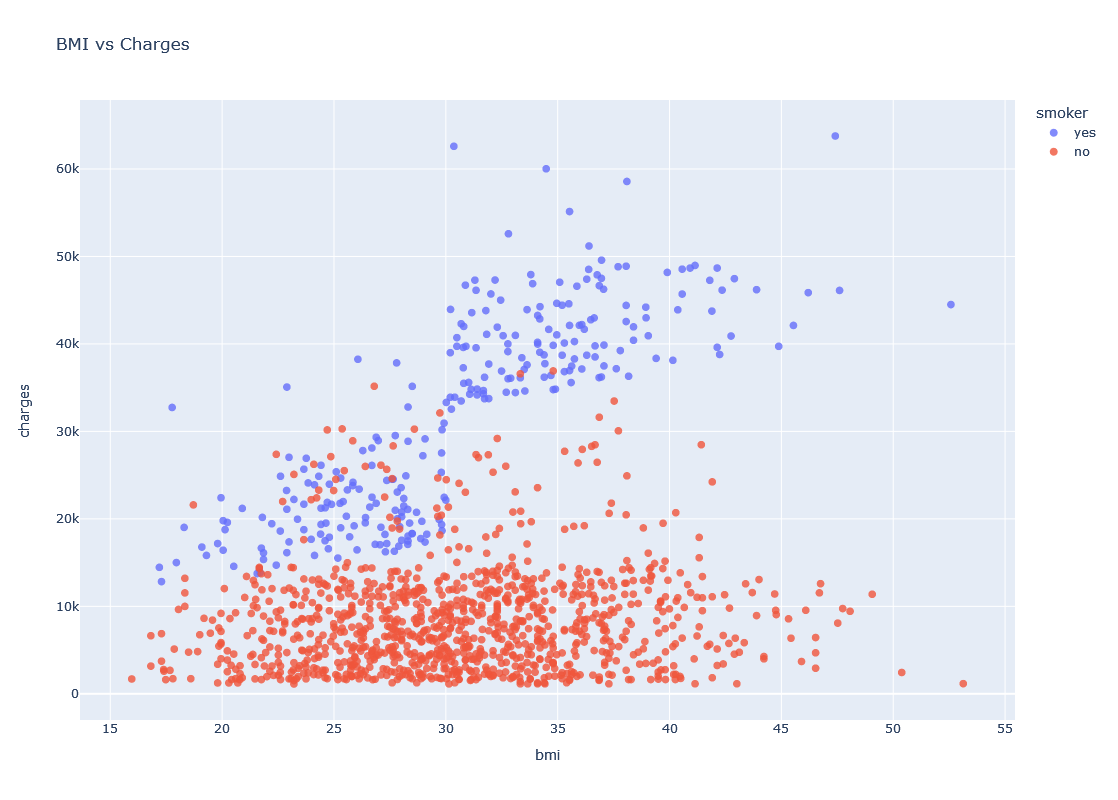

In [44]:
fig = px.scatter(medical_df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8, 
                 hover_data = ['sex'],
                 title = 'BMI vs Charges',
                 width = 1000,
                 height = 800,)
fig.update_traces(marker_size = 8)
# fig.show()

<h2 align = center>Correlation between different features.</h2>

<h3>Between Charges and Age</h3>

In [8]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

<h3>Between BMI and Charges</h3>

In [9]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362878

<h3>Between Children and Charges</h3>

In [10]:
medical_df.charges.corr(medical_df.children)

0.06799822684790469

<h3>Between Smoker and Charges (Categorical data)</h3>

In [11]:
#Converting the yes and no of Smoker Column into 0 and 1 
smoker_values = { 'no' : 0 ,
                  'yes' : 1,}
smoker_num = medical_df.smoker.map(smoker_values) #map function

In [52]:
medical_df.charges.corr(smoker_num)

0.7872514304984782

<h3>Between Sex and Charges</h3>

In [12]:
sex_values = { 'male' : 0 ,
              'female' : 1,}
sex_num = medical_df.sex.map(sex_values)

In [13]:
medical_df.charges.corr(sex_num)

-0.057292062202025346

In [14]:
#using pandas .corr() to display a table of correlation between each features
numerical_columns = medical_df.select_dtypes(include=['int', 'float']).columns
medical_df_nums = medical_df[numerical_columns]
medical_df_nums.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

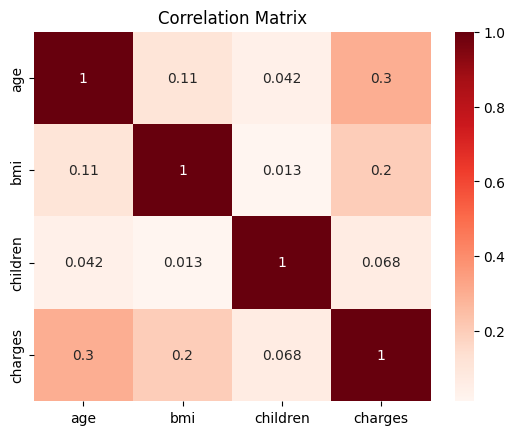

In [15]:
sns.heatmap(medical_df_nums.corr(),
            cmap ='Reds',
            annot = True,)
plt.title('Correlation Matrix')

<h3> Changing categorical <b>Smoker</b> to numerical <b> {0,1} </b></h3> 

In [16]:
smoker_codes = { 'no' : 0 ,
                 'yes' : 1 ,}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [17]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


<h3> Same for <b>Gender</b></h3>

In [18]:
gender_code = { 'female' : 0 ,
                'male' : 1 ,}
medical_df['gender_code'] = medical_df.sex.map(gender_code)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,gender_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [93]:
numerical_columns = medical_df.select_dtypes(include=['int', 'float']).columns
medical_df_nums = medical_df[numerical_columns]
# medical_df_nums = medical_df_nums.drop(columns=['charges'])
# med

<h3>Doing <b>One-Hot Encoding</b> for <b>region column</b></h3>

In [94]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(medical_df[['region']])
one_hot = enc.transform(medical_df[['region']]).toarray()

In [95]:
medical_df_nums[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

C:\Users\mayan\AppData\Local\Temp\ipykernel_12660\2791345899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_df_nums[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
C:\Users\mayan\AppData\Local\Temp\ipykernel_12660\2791345899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medical_df_nums[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [96]:
medical_df_nums

,age,bmi,children,charges,smoker_code,gender_code,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0,0,0.0,0.0,0.0,1.0


In [28]:
from sklearn.model_selection import train_test_split

<h3>Feature Scaling</h3>

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [98]:
scaling_columns = ['age', 'bmi', 'children']
scaler.fit(medical_df_nums[scaling_columns])

StandardScaler()

In [99]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [100]:
from sklearn.model_selection import train_test_split
train_df , test_df = train_test_split(medical_df_nums,test_size = 0.2 , random_state = 69)

In [122]:
x_train = train_df.loc[:,train_df.columns != 'charges'].copy()
x_test = test_df.loc[:,test_df.columns != 'charges'].copy()
y_train = train_df['charges'].copy()
y_test = test_df['charges'].copy()

In [123]:
medical_df_nums

,age,bmi,children,charges,smoker_code,gender_code,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0,0,0.0,0.0,0.0,1.0


In [71]:
target = medical_df.charges.values #target variable

<h2 align = center >Linear Regression using <b>library <i>Scikit-learn</i> LinearRegression</b></h2>

<h3>Importing LinearRegression class from sklearn</h3>

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [74]:
model.fit(x_train,y_train)

LinearRegression()

<h3>Printing <b>co-efficients</b></h3>

In [75]:
columns = medical_df_nums.columns.to_list()
print(f"Column Names : {columns}")
print(f"Co-efficients : {model.coef_}\n")
print(f"Intercept : {model.intercept_}\n")
print(f"No. of parameters read : {model.n_features_in_}")
# print(f"Name of the parameters : {model.feature_names_in_}")

Column Names : ['age', 'bmi', 'children', 'smoker_code', 'gender_code', 'northeast', 'northwest', 'southeast', 'southwest']
Co-efficients : [ 2.45184100e+07  1.82189710e+07  6.61065147e+04  2.37238605e+04
 -2.13632533e+02  6.14773438e+02  3.84084998e+02 -5.25024800e+02
 -4.73833626e+02]

Intercept : 17833265.72848645

No. of parameters read : 9


In [76]:
predicted = model.predict(x_test)

In [77]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predicted)

In [78]:
print(score)

-4537.779077577115
